In [1]:
# things we need for NLP
import nltk
nltk.download('punkt')
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

import numpy as np
import random

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import utils
from keras import layers

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


C:\Users\vivek\Anaconda3\envs\chatbot\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# import our chat-bot intents file
import json
with open('intents.json') as json_data:
    intents = json.load(json_data)

In [3]:
words = []
classes = []
documents = []
ignore_words = ['?']
# loop through each sentence in our intents patterns
for intent in intents['intents']:
    for pattern in intent['patterns']:
        pattern = pattern.lower()
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        words.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# lemmatize and lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# remove duplicates
classes = sorted(list(set(classes)))

print (len(documents), "documents",documents)
print (len(classes), "classes", classes)
print (len(words), "unique lemmatized words", words)

668 documents [(['hi'], 'greeting'), (['how', 'are', 'you'], 'greeting'), (['is', 'anyone', 'there', '?'], 'greeting'), (['hello'], 'greeting'), (['good', 'day'], 'greeting'), (['hey'], 'greeting'), (['sup'], 'greeting'), (['whatsup'], 'greeting'), (['hello', 'there'], 'greeting'), (['whats', 'up'], 'greeting'), (['bye'], 'goodbye'), (['see', 'you', 'later'], 'goodbye'), (['goodbye'], 'goodbye'), (['get', 'lost'], 'goodbye'), (['bubye'], 'goodbye'), (['bye', 'bye'], 'goodbye'), (['tata'], 'goodbye'), (['see', 'you'], 'goodbye'), (['nice', 'meeting', 'you'], 'goodbye'), (['thanks'], 'thanks'), (['thank', 'you'], 'thanks'), (['that', "'s", 'helpful'], 'thanks'), (['thanks', 'a', 'lot'], 'thanks'), (['thanks', 'a', 'ton'], 'thanks'), (['ty'], 'thanks'), (['tysm'], 'thanks'), (['thank', 'you', 'so', 'much'], 'thanks'), ([], 'noanswer'), (['what', 'is', 'the', 'college', 'fees', 'at', 'mpstme', '?'], 'generalfeestructure'), (['how', 'much', 'fee', 'is', 'charged', 'for', 'engineering', '?']

In [4]:
# create our training data
training = []
output = []
# create an empty array for our output
output_empty = [0] * len(classes)

# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    #print(classes.index(doc[1]))
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])
    print(pattern_words)

['hi']
['how', 'are', 'you']
['is', 'anyone', 'there', '?']
['hello']
['good', 'day']
['hey']
['sup']
['whatsup']
['hello', 'there']
['whats', 'up']
['bye']
['see', 'you', 'later']
['goodbye']
['get', 'lost']
['bubye']
['bye', 'bye']
['tata']
['see', 'you']
['nice', 'meeting', 'you']
['thanks']
['thank', 'you']
['that', "'s", 'helpful']
['thanks', 'a', 'lot']
['thanks', 'a', 'ton']
['ty']
['tysm']
['thank', 'you', 'so', 'much']
[]
['what', 'is', 'the', 'college', 'fee', 'at', 'mpstme', '?']
['how', 'much', 'fee', 'is', 'charged', 'for', 'engineering', '?']
['what', 'is', 'the', 'fee', 'for', 'engineering', '?']
['what', 'is', 'the', 'fee', 'for', 'different', 'course', '?']
['what', 'is', 'the', 'tuition', 'fee', '?']
['fee', 'structure']
['fee']
['fee', 'for', 'btech']
['fee', 'for', 'mbatech']
['fee', 'for', 'btech', 'integrated']
['fee', 'at', 'mpstme']
['charge']
['tell', 'me', 'about', 'the', 'fee']
['tell', 'me', 'about', 'the', 'fee', 'structure']
['what', 'is', 'the', 'admissio

In [7]:
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)

# create train and test lists
train_x = list(training[:,0])
train_y = list(training[:,1])

In [8]:
model = Sequential()
model.add(Dense(8, input_shape=[len(train_x[0],)]))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(len(train_y[0]), activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(np.array(train_x), np.array(train_y), epochs=500, batch_size=8)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 8)                 1632      
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_8 (Dense)              (None, 49)                441       
Total params: 2,217
Trainable params: 2,217
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
668/668 [==============================] - 1s 823us/step - loss: 3.8516 - acc: 0.0404
Epoch 2/500
668/668 [==============================] - 0s 214us/step - loss: 3.6912 - acc: 0.1317
Epoch 3/500
668/668 [==============================] - 0s 259us/step - loss:

668/668 [==============================] - 0s 196us/step - loss: 0.0103 - acc: 0.9985
Epoch 75/500
668/668 [==============================] - 0s 177us/step - loss: 0.0102 - acc: 0.9970
Epoch 76/500
668/668 [==============================] - 0s 180us/step - loss: 0.0098 - acc: 0.9970
Epoch 77/500
668/668 [==============================] - 0s 171us/step - loss: 0.0111 - acc: 0.9955
Epoch 78/500
668/668 [==============================] - 0s 188us/step - loss: 0.0105 - acc: 0.9985
Epoch 79/500
668/668 [==============================] - 0s 189us/step - loss: 0.0105 - acc: 0.9970
Epoch 80/500
668/668 [==============================] - 0s 188us/step - loss: 0.0116 - acc: 0.9985
Epoch 81/500
668/668 [==============================] - 0s 148us/step - loss: 0.0095 - acc: 0.9970
Epoch 82/500
668/668 [==============================] - 0s 184us/step - loss: 0.0087 - acc: 0.9985
Epoch 83/500
668/668 [==============================] - 0s 180us/step - loss: 0.0089 - acc: 0.9985
Epoch 84/500
668/668 [=

668/668 [==============================] - 0s 200us/step - loss: 0.0054 - acc: 0.9970
Epoch 157/500
668/668 [==============================] - 0s 150us/step - loss: 0.0055 - acc: 0.9985
Epoch 158/500
668/668 [==============================] - 0s 210us/step - loss: 0.0052 - acc: 0.9985
Epoch 159/500
668/668 [==============================] - 0s 187us/step - loss: 0.0052 - acc: 0.9985
Epoch 160/500
668/668 [==============================] - 0s 168us/step - loss: 0.0053 - acc: 0.9985
Epoch 161/500
668/668 [==============================] - 0s 183us/step - loss: 0.0054 - acc: 0.9985
Epoch 162/500
668/668 [==============================] - 0s 191us/step - loss: 0.0048 - acc: 0.9985
Epoch 163/500
668/668 [==============================] - 0s 187us/step - loss: 0.0053 - acc: 0.9985
Epoch 164/500
668/668 [==============================] - 0s 155us/step - loss: 0.0054 - acc: 0.9985
Epoch 165/500
668/668 [==============================] - 0s 208us/step - loss: 0.0054 - acc: 0.9985
Epoch 166/500


668/668 [==============================] - 0s 183us/step - loss: 0.0046 - acc: 0.9985
Epoch 238/500
668/668 [==============================] - 0s 191us/step - loss: 0.0045 - acc: 0.9985
Epoch 239/500
668/668 [==============================] - 0s 289us/step - loss: 0.0047 - acc: 0.9985
Epoch 240/500
668/668 [==============================] - 0s 191us/step - loss: 0.0049 - acc: 0.9985
Epoch 241/500
668/668 [==============================] - 0s 187us/step - loss: 0.0048 - acc: 0.9985
Epoch 242/500
668/668 [==============================] - 0s 197us/step - loss: 0.0052 - acc: 0.9985
Epoch 243/500
668/668 [==============================] - 0s 212us/step - loss: 0.0049 - acc: 0.9985
Epoch 244/500
668/668 [==============================] - 0s 176us/step - loss: 0.0047 - acc: 0.9985
Epoch 245/500
668/668 [==============================] - 0s 211us/step - loss: 0.0047 - acc: 0.9985
Epoch 246/500
668/668 [==============================] - 0s 208us/step - loss: 0.0045 - acc: 0.9985
Epoch 247/500


668/668 [==============================] - 0s 236us/step - loss: 0.0045 - acc: 0.9985
Epoch 319/500
668/668 [==============================] - 0s 233us/step - loss: 0.0046 - acc: 0.9985
Epoch 320/500
668/668 [==============================] - 0s 198us/step - loss: 0.0046 - acc: 0.9985
Epoch 321/500
668/668 [==============================] - 0s 194us/step - loss: 0.0046 - acc: 0.9985
Epoch 322/500
668/668 [==============================] - 0s 182us/step - loss: 0.0047 - acc: 0.9985
Epoch 323/500
668/668 [==============================] - 0s 192us/step - loss: 0.0047 - acc: 0.9985
Epoch 324/500
668/668 [==============================] - 0s 191us/step - loss: 0.0048 - acc: 0.9985
Epoch 325/500
668/668 [==============================] - 0s 262us/step - loss: 0.0048 - acc: 0.9985
Epoch 326/500
668/668 [==============================] - 0s 253us/step - loss: 0.0045 - acc: 0.9985
Epoch 327/500
668/668 [==============================] - 0s 185us/step - loss: 0.0046 - acc: 0.9985
Epoch 328/500


668/668 [==============================] - 0s 230us/step - loss: 0.0044 - acc: 0.9985
Epoch 401/500
668/668 [==============================] - 0s 229us/step - loss: 0.0044 - acc: 0.9985
Epoch 402/500
668/668 [==============================] - 0s 218us/step - loss: 0.0043 - acc: 0.9985
Epoch 403/500
668/668 [==============================] - 0s 215us/step - loss: 0.0044 - acc: 0.9985
Epoch 404/500
668/668 [==============================] - 0s 220us/step - loss: 0.0045 - acc: 0.9985
Epoch 405/500
668/668 [==============================] - 0s 208us/step - loss: 0.0044 - acc: 0.9985
Epoch 406/500
668/668 [==============================] - 0s 220us/step - loss: 0.0042 - acc: 0.9985
Epoch 407/500
668/668 [==============================] - 0s 214us/step - loss: 0.0046 - acc: 0.9985
Epoch 408/500
668/668 [==============================] - 0s 199us/step - loss: 0.0046 - acc: 0.9985
Epoch 409/500
668/668 [==============================] - 0s 203us/step - loss: 0.0049 - acc: 0.9985
Epoch 410/500


668/668 [==============================] - 0s 212us/step - loss: 0.0043 - acc: 0.9985
Epoch 483/500
668/668 [==============================] - 0s 217us/step - loss: 0.0045 - acc: 0.9985
Epoch 484/500
668/668 [==============================] - 0s 212us/step - loss: 0.0043 - acc: 0.9985
Epoch 485/500
668/668 [==============================] - 0s 228us/step - loss: 0.0043 - acc: 0.9985
Epoch 486/500
668/668 [==============================] - 0s 194us/step - loss: 0.0044 - acc: 0.9985
Epoch 487/500
668/668 [==============================] - 0s 186us/step - loss: 0.0042 - acc: 0.9985
Epoch 488/500
668/668 [==============================] - 0s 193us/step - loss: 0.0044 - acc: 0.9985
Epoch 489/500
668/668 [==============================] - 0s 203us/step - loss: 0.0043 - acc: 0.9985
Epoch 490/500
668/668 [==============================] - 0s 188us/step - loss: 0.0044 - acc: 0.9985
Epoch 491/500
668/668 [==============================] - 0s 205us/step - loss: 0.0044 - acc: 0.9985
Epoch 492/500


In [9]:
model.save('model_ChatBot.h5')

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['acc', 'loss'])

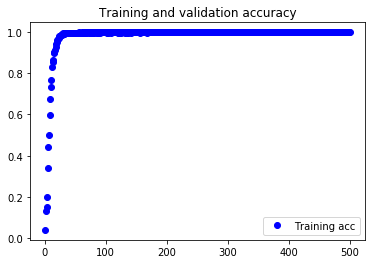

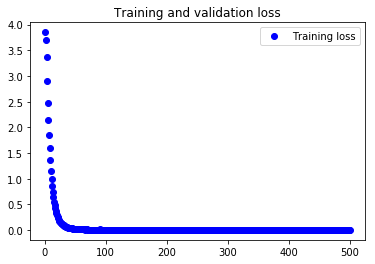

In [11]:
acc = history.history['acc']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
import re
def clean_up_sentence(sentence):
    # tokenize the pattern
    sentence_words = nltk.word_tokenize(sentence)
    
    ''''
    #converting streams to a unique form
    sentence_words = (str(sentence_words).lower())
    sentence_words = re.sub(r"i'm", "i am", sentence_words)
    sentence_words = re.sub(r"he's", "he is", sentence_words)
    sentence_words = re.sub(r"she's", "she is", sentence_words)
    sentence_words = re.sub(r"that's", "that is", sentence_words)
    sentence_words = re.sub(r"what's", "what is", sentence_words)
    sentence_words = re.sub(r"where's", "where is", sentence_words)
    sentence_words = re.sub(r"how's", "how is", sentence_words)
    sentence_words = re.sub(r"\'ll", " will", sentence_words)
    sentence_words = re.sub(r"\'ve", " have", sentence_words)
    sentence_words = re.sub(r"\'re", " are", sentence_words)
    sentence_words = re.sub(r"\'d", " would", sentence_words)
    sentence_words = re.sub(r"n't", " not", sentence_words)
    sentence_words = re.sub(r"won't", "will not", sentence_words)
    sentence_words = re.sub(r"can't", "cannot", sentence_words)
    sentence_words = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", sentence_words)
    sentence_words = re.sub(r"\b-tech", "btech", sentence_words)
    sentence_words = re.sub(r"\b.tech", "btech", sentence_words)
    sentence_words = re.sub(r"\mba-tech", "mbatech", sentence_words)
    sentence_words = re.sub(r"\mba.tech", "mbatech", sentence_words)
    sentence_words = re.sub(r"\b-tech integrated", "btech integrated", sentence_words)
    sentence_words = re.sub(r"\b.tech integrated", "btech integrated", sentence_words)
    sentence_words = re.sub(r"\b.tech int", "btech integrated", sentence_words) '''
    
    # lemmatize each word
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def bow(sentence, words, show_details=False):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)

    return(np.array(bag))

In [14]:
p = bow("hello", words)
print (p)
print (classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
['CourseB.Tech', 'CourseB.TechInt', 'CourseM.Tech', 'CourseMBATech', 'CourseMCA', 'CoursePGDM', 'CoursePhD', 'accreditation', 'affirmative', 'btechandmbatechadmissions', 'generalfeestructure', 'goodbye', 'greeting', 'hours', 'integratedprograms', 'noanswer', 'offensivewords', 'opentoday', 'otherprogramsadmissions', 'postgradprograms', 'streamCivil', 'streamComputer', 'streamDataScience', 'streamElectrical', 'streamElectronicsandTelecommunications', 'streamIndustrialAutomation', 'streamInformationTechnology', 'streamMechanical', 'streamMechatronics', 'streamartificialintelligence',

In [15]:
d = len(p)
f = len(documents)-2
a = np.zeros([f, d])

In [16]:
tot = np.vstack((p,a))

In [17]:
prediction = model.predict(tot)
predicted_index = np.argmax(prediction)
predicted_index

61